In [1]:
import pandas as pd;
import numpy as np;

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline


In [4]:
DATASET_PATH = "dataset/"
print(os.listdir(DATASET_PATH))


['myntradataset', 'styles.csv', 'images', 'selected', 'selected_styles.csv']


['myntradataset', 'styles.csv', 'images', 'selected', 'selected_styles.csv']
38589.jpg
24922.jpg
15459.jpg
17231.jpg
31574.jpg
29571.jpg
19095.jpg
23815.jpg
47040.jpg
51696.jpg
figure Figure(640x480)
col 6


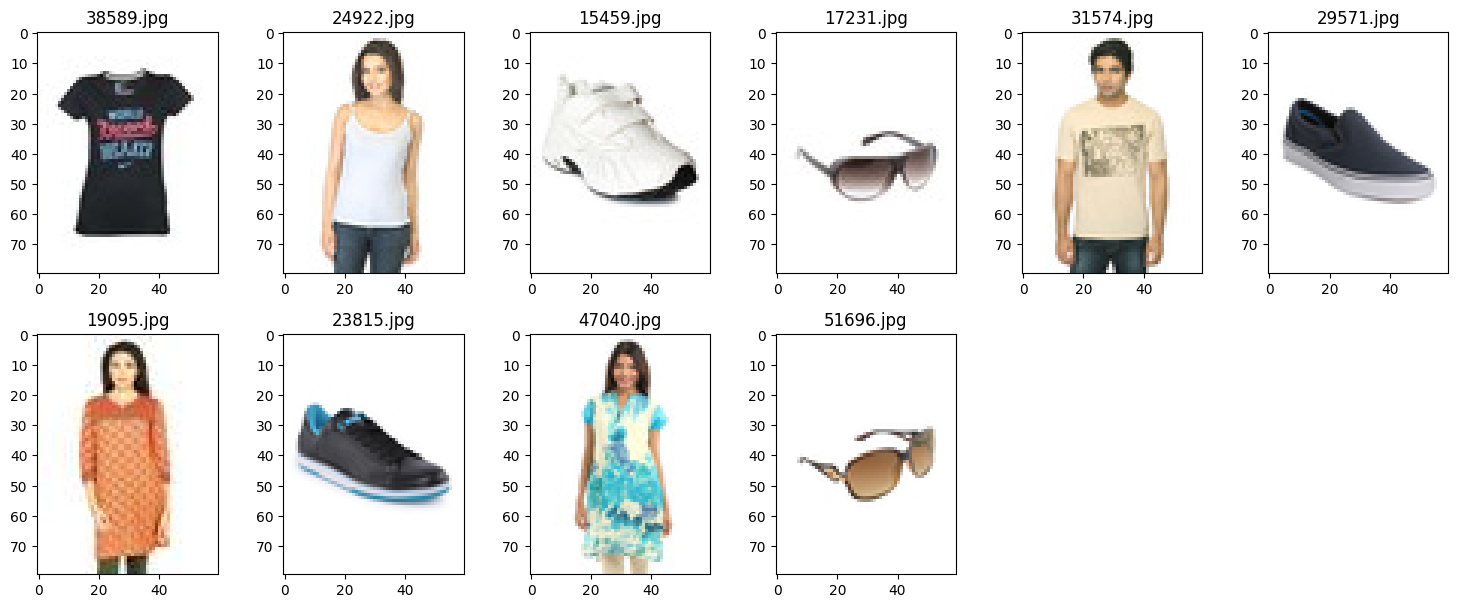

In [5]:
list_directory = os.listdir(DATASET_PATH)
print(list_directory)



index=0
for i in range (len(list_directory)):
    if list_directory[i]=="selected":
        index=i
        break

# what is in the image directory
imageIndex = os.listdir(DATASET_PATH+list_directory[index])
# print(type(imageIndex))
head = 10

# collecting some samples in list
sampleImages = []

# showing indices
for i in range (head):
    sampleImages.append(imageIndex[i])
    print(sampleImages[i])

# choosing some samples to observe
fig=plt.figure()
print('figure' , fig)
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
row = 5
col = row+1
print('col' , col)

for i in range (len(sampleImages)):
    Image_path=DATASET_PATH+list_directory[index]+"/"+sampleImages[i]
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(row, col, i+1))
    subplot_title=sampleImages[i]
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)

fig.tight_layout()
plt.show()

In [6]:
df = pd.read_csv(DATASET_PATH + "selected_styles.csv", nrows=44000, error_bad_lines=False)
df.head(10)


/tmp/ipykernel_66722/1182149442.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(DATASET_PATH + "selected_styles.csv", nrows=44000, error_bad_lines=False)


,id,articleType
0,15970,Shirts
1,59263,Watches
2,53759,Tshirts
3,1855,Tshirts
4,30805,Shirts
5,26960,Shirts
6,30039,Watches
7,9204,Casual Shoes
8,12369,Shirts
9,29928,Watches


In [7]:
#for easy access we add another colun to the styles.csv named image

df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df.head(10)

,id,articleType,image
0,15970,Shirts,15970.jpg
1,59263,Watches,59263.jpg
2,53759,Tshirts,53759.jpg
3,1855,Tshirts,1855.jpg
4,30805,Shirts,30805.jpg
5,26960,Shirts,26960.jpg
6,30039,Watches,30039.jpg
7,9204,Casual Shoes,9204.jpg
8,12369,Shirts,12369.jpg
9,29928,Watches,29928.jpg


In [8]:
#building another dataframe with filename and image type
augmentedDataframe = pd.DataFrame({
    'filename': df['image'],
    'type': df['articleType']
})

# total number of entries in the dataframe
total_row = len(augmentedDataframe)
print('total row count: ', total_row)

augmentedDataframe.head(1000)

total row count:  24260


,filename,type
0,15970.jpg,Shirts
1,59263.jpg,Watches
2,53759.jpg,Tshirts
3,1855.jpg,Tshirts
4,30805.jpg,Shirts
...,...,...
995,42671.jpg,Kurtas
996,3556.jpg,Casual Shoes
997,26334.jpg,Watches
998,12101.jpg,Kurtas


In [9]:

#creating the list with unique values 
unique_types = augmentedDataframe['type'].unique().tolist()
total_class = len(unique_types)
print(total_class , "totla number of classes")
print(unique_types)
print(unique_types[0])
print(unique_types.index(unique_types[0]))
#adding uniique types to the augmented data frame.
augmentedDataframe['number_types'] = augmentedDataframe['type'].apply(lambda x: unique_types.index(x) if x in unique_types else 0)
augmentedDataframe.head(10)

10 totla number of classes
['Shirts', 'Watches', 'Tshirts', 'Casual Shoes', 'Tops', 'Kurtas', 'Sports Shoes', 'Shorts', 'Heels', 'Sunglasses']
Shirts
0


,filename,type,number_types
0,15970.jpg,Shirts,0
1,59263.jpg,Watches,1
2,53759.jpg,Tshirts,2
3,1855.jpg,Tshirts,2
4,30805.jpg,Shirts,0
5,26960.jpg,Shirts,0
6,30039.jpg,Watches,1
7,9204.jpg,Casual Shoes,3
8,12369.jpg,Shirts,0
9,29928.jpg,Watches,1


In [10]:
#counting the number of articles related to unique type.mr
pd.set_option('display.max_rows', 200)
augmentedDataframe['type'].value_counts()

Tshirts         7070
Shirts          3217
Casual Shoes    2846
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Heels           1323
Sunglasses      1073
Shorts           547
Name: type, dtype: int64

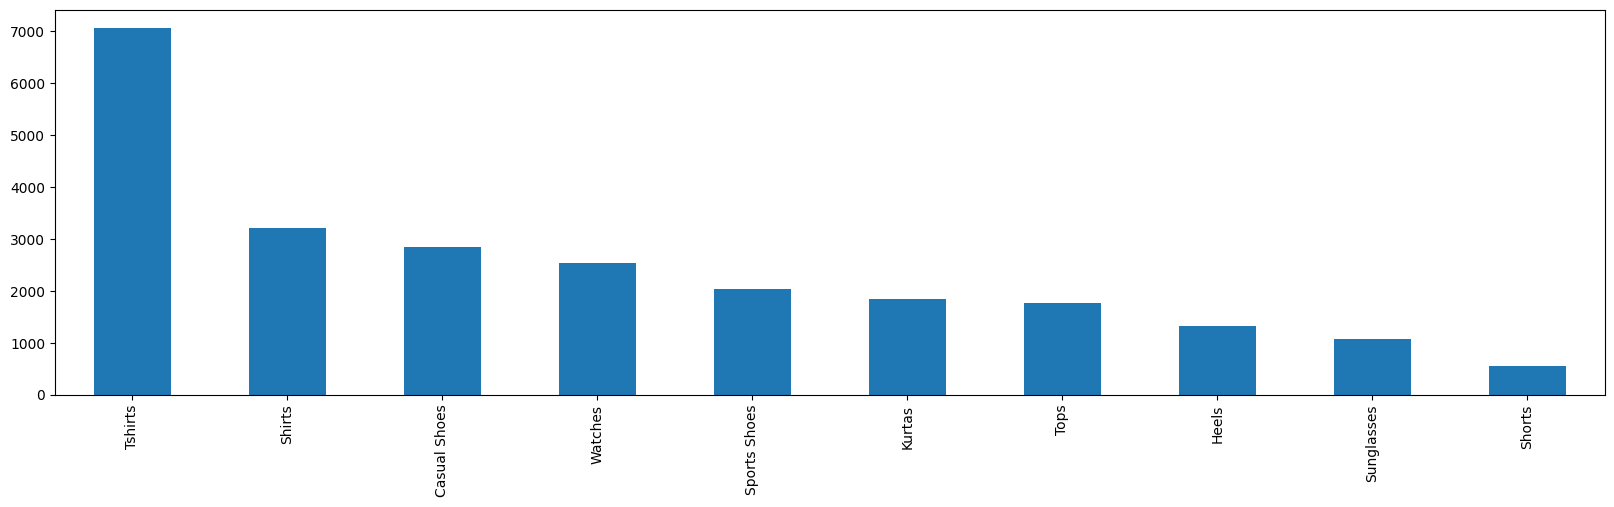

In [11]:
plt.figure(figsize=(20,5))
augmentedDataframe['type'].value_counts().plot(kind='bar',x='type',y='filename')
plt.show()

In [12]:
# working with train and test data

#insert images and labels into numpy arrray

#function to get images and insert them into an image array.
#here X = image_Data and Y= label_data;
#start and stop parameter of the function are useful for separating train and test data.

def getData(start,stop):
    x_data = []
    y_data = []
    #start = 0 #setting start parameter
    #stop = int(0.001*total_row) #setting stop parameter 
    
    for i in range(start, stop): 
        Image_path=DATASET_PATH+list_directory[index]+"/"+augmentedDataframe.loc[i,'filename']
#         print(augmentedDataframe.loc[i,'filename'])
        image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
        try:
            resized_img = cv2.resize(image, dsize=(28, 28))
        except:
            print("Rejected Image: "+augmentedDataframe.loc[i,'filename'])
            continue
        x_data.append(resized_img) 
        y_values = augmentedDataframe.loc[i,'number_types'] # earlier it was type
        y_data.append(y_values)
                
    return x_data, y_data

<class 'list'>


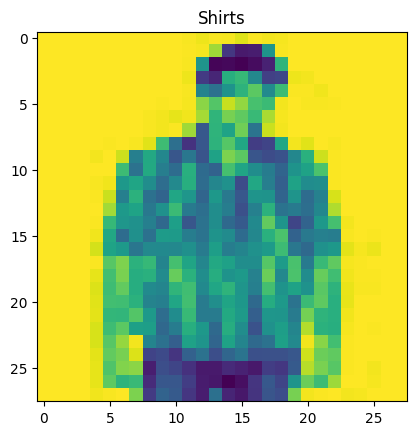

In [13]:
#testing the above function
X=[]
Y=[]
# for now start=0,stop=(0.001*total_row)
# total_row=count of rows in augmented data frame
start = 0
stop = int(0.001*total_row) # testing with 0.1% image of the dataset
X,Y=getData(start,stop)
print(type(X))
# print(X[0])
plt.title(unique_types[Y[0]])
plt.imshow(X[0])

In [14]:

#converiting above arrays into numpy arrays
X = np.array(X).reshape(-1, 28,28,1)
Y = np.array(Y)



In [15]:
#image normalization by 255
X = X/255.0


#resize shapes
Y = Y.reshape(len(X),)


#check sample;
print(type(X))
print(X.shape)
print(Y.shape)


<class 'numpy.ndarray'>
(24, 28, 28, 1)
(24,)


In [16]:
#adding all the images to array.
X=[]
Y=[]
start = 0
stop = total_row
X,Y=getData(start,stop)

# conversion into numpy array
X = np.array(X).reshape(-1, 28,28,1)
Y = np.array(Y)

# normalizing
X = X/255

# processing Y_train for dimension matching
Y = Y.reshape(len(X),)

[ WARN:0@5.022] global loadsave.cpp:244 findDecoder imread_('dataset/selected/39403.jpg'): can't open/read file: check file path/integrity


Rejected Image: 39403.jpg
Rejected Image: 39410.jpg


[ WARN:0@6.530] global loadsave.cpp:244 findDecoder imread_('dataset/selected/39410.jpg'): can't open/read file: check file path/integrity
[ WARN:0@10.056] global loadsave.cpp:244 findDecoder imread_('dataset/selected/39425.jpg'): can't open/read file: check file path/integrity


Rejected Image: 39425.jpg


In [17]:
print(type(X))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
(24257, 28, 28, 1)
(24257,)


In [18]:
#splitting train test division to 90:10;
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 500)
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Test Image Data Shape: ',X_test.shape)
print('Test Label Data Shape: ',Y_test.shape)

Train Image Data Shape:  (19405, 28, 28, 1)
Train Label Data Shape:  (19405,)
Test Image Data Shape:  (4852, 28, 28, 1)
Test Label Data Shape:  (4852,)


In [20]:
X_test, X_validate, Y_test, Y_validate = train_test_split(X_test, Y_test, test_size = 0.5, random_state = 500)
print('Test Image Data Shape: ',X_test.shape)
print('Test Label Data Shape: ',Y_test.shape)
print('Validation Image Data Shape: ',X_validate.shape)
print('Validation Label Data Shape: ',Y_validate.shape)

Test Image Data Shape:  (2426, 28, 28, 1)
Test Label Data Shape:  (2426,)
Validation Image Data Shape:  (2426, 28, 28, 1)
Validation Label Data Shape:  (2426,)


In [21]:
#model creattin start;

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
import datetime, os
from tensorflow.keras.callbacks import TensorBoard

#cnn model with 3 layers

def build_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu' ))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu' ))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu' ))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Flatten())
    cnn_model.add(Dense(units = 512, activation = 'relu'))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Dense(units = total_class, activation = 'softmax'))
    return cnn_model

#build model
model=build_model()


print(model.summary())

2023-04-25 13:46:49.742002: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 13:46:50.627204: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/punya/Desktop/jupyter/env/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-25 13:46:50.627296: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-25 13:46:52.706239: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [22]:
#training the model
def train_model(model):
    model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
    history = model.fit(X_train, Y_train, batch_size = 128, epochs = 200, verbose = 1, validation_data = (X_validate, Y_validate))

train_model(model)
from keras import models


model.save('visual_product_recommend-mainfold10.h5')
# model = models.load_model('finalcnnmodel.h5')



AttributeError: 'NoneType' object has no attribute 'history'

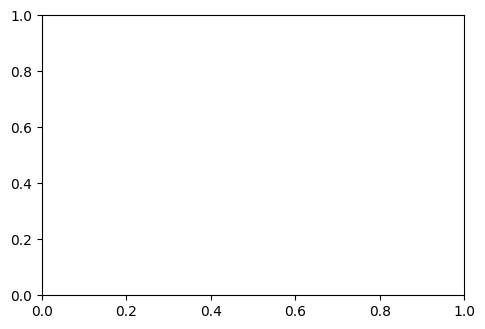

In [23]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

1/1 [==============================] - 0s 322ms/step
2 value
2
76/76 [==============================] - 0s 6ms/step
[[0.03 0.   0.97 ... 0.   0.   0.  ]
 [0.   0.   0.61 ... 0.   0.   0.  ]
 [0.   0.   1.   ... 0.   0.   0.  ]
 ...
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.68 0.   0.32 ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]]
76/76 [==============================] - 1s 6ms/step - loss: 0.3303 - accuracy: 0.8912
[0.3303064703941345, 0.8911789059638977]


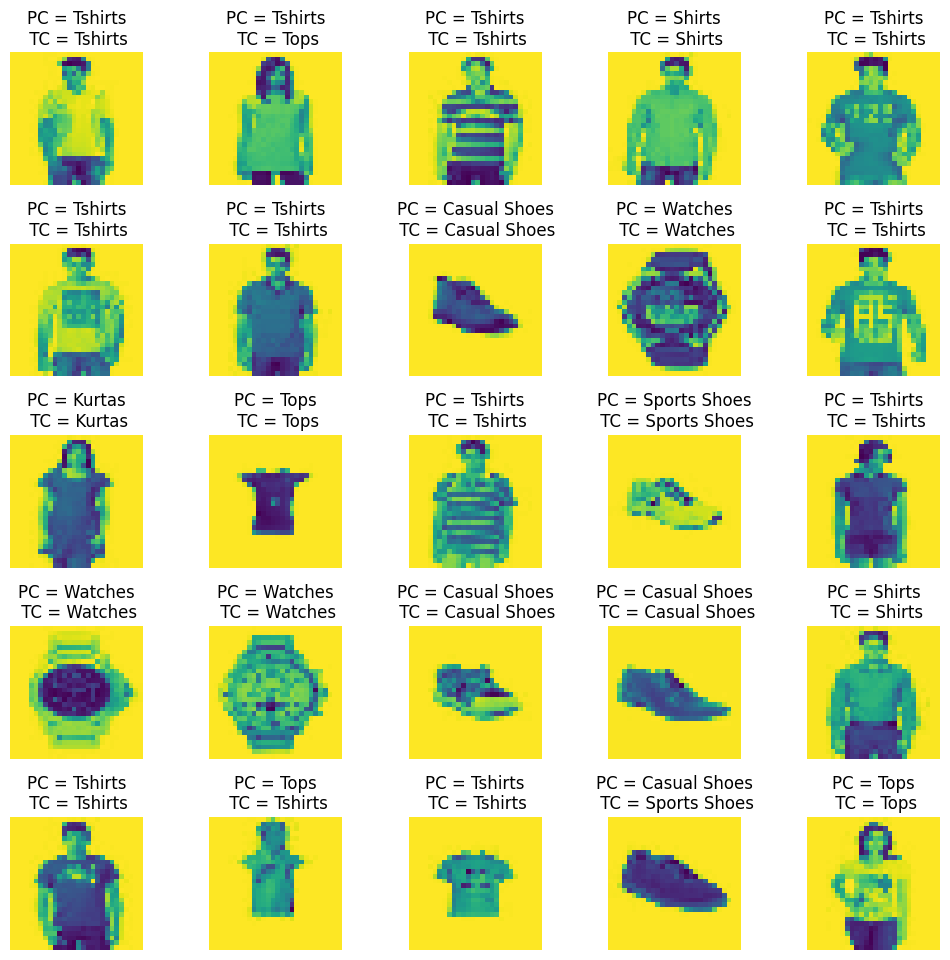

In [24]:
# from keras import models


# model.save('visual_product_recommend1.h5')
# model = models.load_model('visual_product_recommend.h5')

# predicted_classes = model.predict_classes(X_test)
value = model.predict(np.expand_dims(X_test[20] , axis = 0)).round(2)
print(np.argmax(value) , "value")

print(Y_test[20])
predict_x=model.predict(X_test).round(2)
print(predict_x)


print(model.evaluate(X_test , Y_test))



predicted_classes=np.argmax(predict_x,axis=1)


L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"PC = {unique_types[predicted_classes[i]]}\n TC = {unique_types[Y_test[i]]}") #predicted_classes[i]:0.1f #Y_test[i]:0.1f
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)


In [ ]:
#confusion matrix
# from sklearn.metrics import confusion_matrix
# import seaborn as sns;
# plt.figure(figsize=(16,9))
# y_pred_labels = [np.argmax(label) for label in predict_x]
# cm = confusion_matrix(Y_test , y_pred_labels)
# sns.heatmap(cm , annot = True , fmt='d' , xticklabels = "a" , yticklabels = "b")

<Axes: >

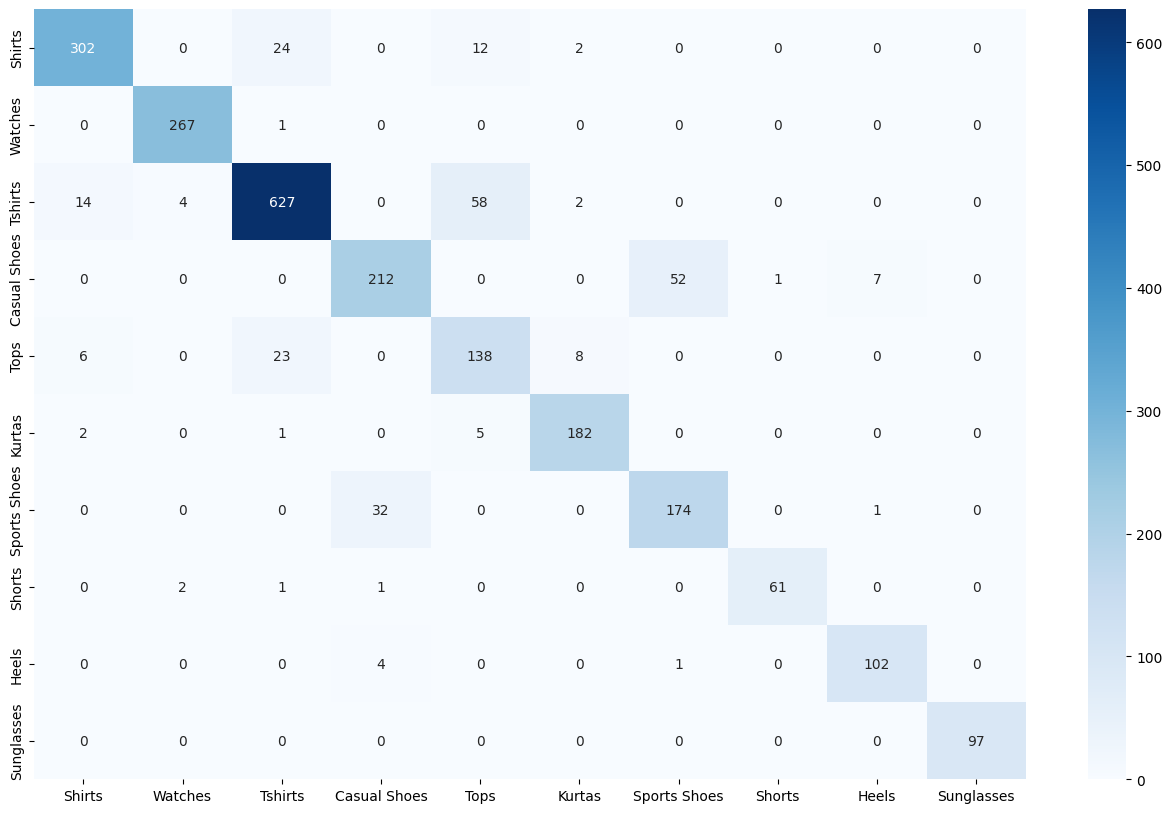

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(16,10))
y_pred_labels = [ np.argmax(label) for label in predict_x]
cm = confusion_matrix(Y_test, y_pred_labels)
# print(cm)
# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=unique_types ,  yticklabels=unique_types ,cmap="Blues")

In [26]:
#single image prediction and finding label of the image
def load_image(i):
    Image_path=DATASET_PATH+list_directory[index]+"/"+augmentedDataframe.loc[i,'filename']
    Image_id=augmentedDataframe.loc[i,'filename'].split(".")
    res=Image_id[0]
    image = cv2.imread(Image_path,cv2.IMREAD_COLOR)
    resized_img = cv2.resize(image, dsize=(224, 224))
    return resized_img,res




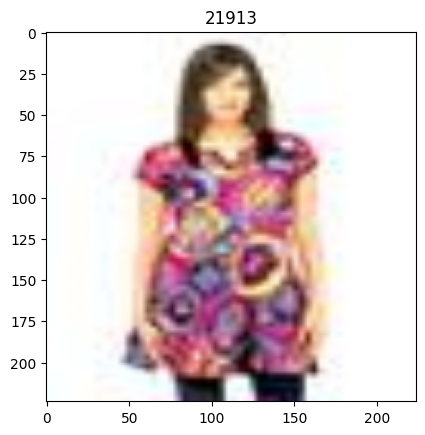

In [28]:
img,img_id = load_image(2700)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title(img_id)
plt.imshow(img)

In [29]:
#predict the class of input image
def make_prediction(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    resized_img = cv2.resize(img, dsize=(28, 28))
    x_data = np.array(resized_img).reshape(-1, 28,28,1)
    x_data=x_data/255
    print(x_data)
    print("dkjfdkfjsddsjkjsdjf" , x_data.shape)
    result=model.predict(x_data)
    print("dkfjsadkfjdskafj")
    print(type(result))
    print(np.argmax(result))
    return x_data,unique_types[np.argmax(result)]

In [31]:
numpy_image,result=make_prediction(img)
print(result)

[[[[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [0.98823529]
   [0.98823529]
   [0.99607843]
   [0.99607843]
   [0.99607843]
   [0.97647059]
   [0.96470588]
   [0.97647059]
   [0.97254902]
   [0.98823529]
   [0.99607843]
   [0.99607843]
   [0.99607843]
   [0.99215686]
   [0.99215686]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [0.98431373]
   [0.99607843]
   [0.98823529]
   [0.54901961]
   [0.35294118]
   [0.15686275]
   [0.27058824]
   [0.86666667]
   [0.98823529]
   [0.99215686]
   [0.99215686]
   [0.99607843]
   [0.99607843]
   [0.99607843]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [

In [32]:
#checking for similarrity
typeList=[]
for i, row in df.iterrows(): 
    if(row["articleType"]==result):
        #print(row["id"],row["articleType"])
        if(img_id!=str(row["id"])):
            typeList.append(row['id'])

In [33]:
i=0
X_similar=[]
X_id_similar=[]
X_numpy=[]
for imageId in typeList:
#     print(imageId)
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(imageId)+".jpg"
    image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
    try:
        resized_img = cv2.resize(image, dsize=(28,28))
    except:
        print("can't read file: ", str(imageId)+".jpg")
    X_similar.append(resized_img)
    X_id_similar.append(imageId)
        
X_numpy = np.array(X_similar).reshape(-1, 28,28,1)
X_numpy = X_numpy/255
#print(X_numpy[0])

Text(0.5, 1.0, '20099')

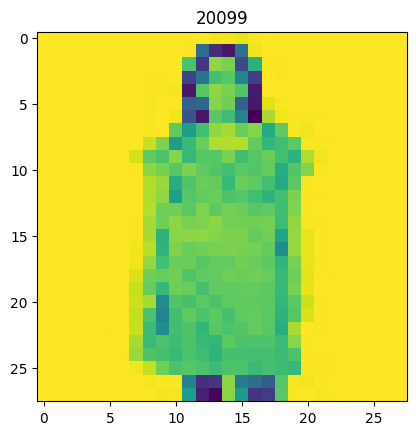

In [34]:
plt.imshow(X_similar[0])
plt.title(X_id_similar[0])

In [35]:
#calculating vector distance between two images
import math
def calculateDistance(i1, i2):
    return math.sqrt(np.sum((i1-i2)**2))

print(calculateDistance(numpy_image,X_numpy[0]))

6.079195397903414


In [36]:
distance_list=[]
for i in range (0, len(X_numpy)):
    distance_list.append(calculateDistance(numpy_image,X_numpy[i]))

sorted_distance_list=distance_list.copy()
#print(distance_list)
sorted_distance_list.sort()

least_ten_distance=sorted_distance_list[0:10]
print(least_ten_distance)
index_distance=[]
for i in range (0, len(least_ten_distance)-1):
    if(least_ten_distance[i]!=least_ten_distance[i+1]):
        index_distance.append(distance_list.index(least_ten_distance[i]))

index_distance=index_distance[0:5]

print(index_distance)

[3.6407535628205205, 3.7247408947194, 3.84599133717545, 3.84738260914826, 3.8806393524687732, 3.959256160260479, 3.9718792381962347, 3.992871387190954, 4.022210539490787, 4.025182170196521]
[31, 262, 249, 1407, 460]


In [37]:
Image_path=DATASET_PATH+list_directory[index]+"/"+str(img_id)+".jpg"
src = cv2.imread(Image_path)
image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 

20099
28690
45856
54588
24406


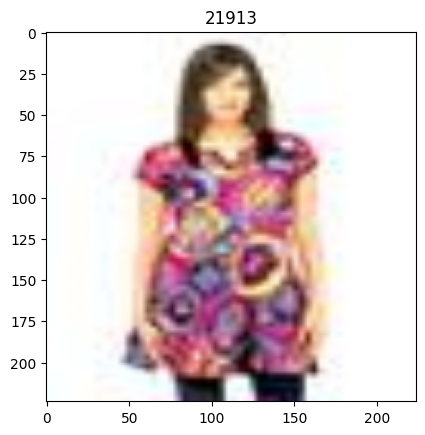

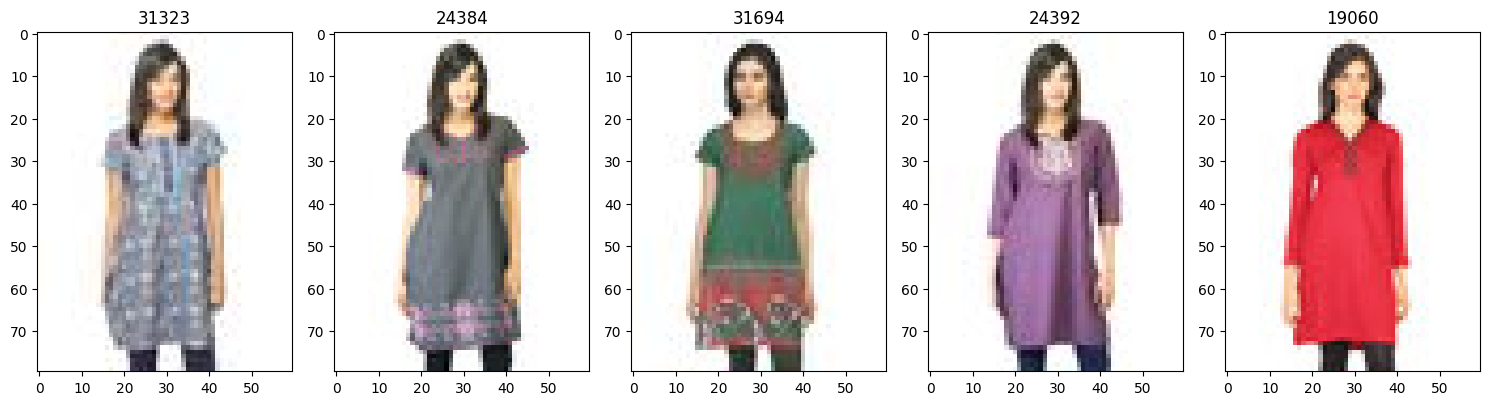

In [38]:
plt.imshow(img)
plt.title(img_id)

fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
for i in range(0,len(index_distance)):
    print(X_id_similar[i])
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(X_id_similar[index_distance[i]])+".jpg"
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(1,5, i+1))
    subplot_title=str(X_id_similar[index_distance[i]])
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)

fig.tight_layout()
plt.show()